**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from os import path

def getLocalTime():
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)

class GrayImageManipulator:
    def __init__(self, path = '', quantization = 8, debug = False) -> None:
        self.path = path
        self.quantization = quantization
        self.debug = debug
        self.result = None
        self.image = None

    def log(self, content, *args):
        print('[%s] %s: ' % (getLocalTime(), content), *args)
    
    def logImageSize(self):
        self.log('Tamanho da imagem', self.image.shape)

    def disableDebug(self) -> None:
        self.debug = False

    def enableDebug(self) -> None:
        self.debug = True

    def setPath(self, path) -> None:
        self.path = path

    def getPath(self, path):
        return path

    def setImage(self, image) -> None:
        self.image = image

    def getImage(self):
        return self.image

    def getResult(self):
        return self.result

    def configImage(self):
        image = cv2.imread(self.path, cv2.IMREAD_GRAYSCALE)

        if not path.isfile(self.path):
            raise TypeError('O caminho não corresponde a um arquivo')

        if image is None:
            raise TypeError('O caminho não corresponde a uma imagem')
        
        self.image = image

    def show(self, mode = 'sync') -> None:
        if self.image is None:
            self.configImage()
            
            if self.debug:
                self.logImageSize()
            
        self.showImage(self.image, mode = mode)

    def showImage(self, image, cmap = 'gray', mode = 'sync') -> None:
        ax = plt.subplots()[1]
        ax.imshow(image, cmap = cmap, vmin = 0, vmax = 255)

        if self.debug:
            self.log('ploting image ...')
            
        if mode == 'sync':
            plt.show()

    def showResult(self, cmap = 'gray', mode = 'sync') -> None:
        self.validateResult()
        self.showImage(self.result, cmap = cmap, mode = mode)

    def saveResult(self, filename = 'result', cmap = 'gray', mode = 'sync') -> None:
        self.validateResult()
        
        ax = plt.subplots()[1]
        ax.imshow(self.result, cmap = cmap, vmin = 0, vmax = 255)

        if self.debug:
            self.log('saving image ...')

        plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

        if mode == 'sync':
            plt.show()

    def validateResult(self):
        if self.result is None:
            raise ValueError('O resultado não pode ser nulo')

In [70]:
# type your code here
# Python code to read image
import math

def getLocalTime():
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)

class GrayImageResizor(GrayImageManipulator):
    def __init__(self, dpi, path = '', debug = False) -> None:
        super().__init__(path=path, debug=debug)
        self.dpi = dpi

    def resize(self, newDpi) -> None:
        if self.image is None:
            self.configImage()

        if self.dpi < newDpi:
            raise ValueError('O novo DPI deve ser menor que: %s' % self.dpi)

        if self.debug:
            self.log('Novo DPI', newDpi)
            self.logImageSize()

        height, width = self.image.shape
        step = self.dpi / newDpi
        roundStep = math.ceil(step)

        newHeight = math.ceil((height / step))
        newWidth = math.ceil((width / step))

        if self.debug:
            self.log('Tamanho da imagem redimensionada', (newHeight, newWidth))
            
        newImage = np.zeros( (newHeight, newWidth) )

        i = 0
        for pointA in np.arange(0, height, step):
            j = 0
            for pointB in np.arange(0, width, step):
                roundA = math.floor(pointA)
                roundB = math.floor(pointB)
                endPointI = roundA + roundStep
                endPointJ = roundB + roundStep

                block = self.image[roundA:endPointI, roundB:endPointJ]

                # newValue = 0
                # for line in block:
                #     for col in line:
                #         newValue += col
                
                # newImage[i][j] = np.round(newValue / (roundStep ** 2))
                newImage[i][j] = block.sum() / (roundStep ** 2)
            
                j += 1
            i += 1

        self.result = newImage

[26/03/2023, 14:13:37] Tamanho da imagem:  (3692, 2812)
[26/03/2023, 14:13:37] ploting image ...: 


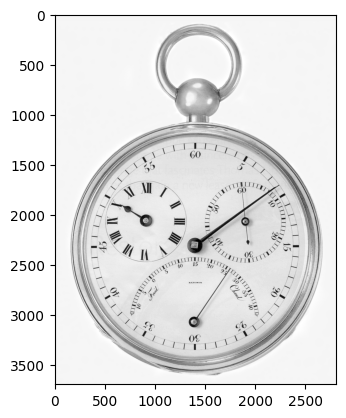

[26/03/2023, 14:13:39] Novo DPI:  300
[26/03/2023, 14:13:39] Tamanho da imagem:  (3692, 2812)
[26/03/2023, 14:13:39] Tamanho da imagem redimensionada:  (887, 675)
[26/03/2023, 14:13:53] saving image ...: 


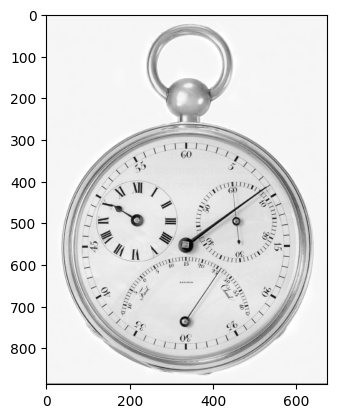

[26/03/2023, 14:13:54] Novo DPI:  150
[26/03/2023, 14:13:54] Tamanho da imagem:  (3692, 2812)
[26/03/2023, 14:13:54] Tamanho da imagem redimensionada:  (444, 338)
[26/03/2023, 14:13:57] saving image ...: 


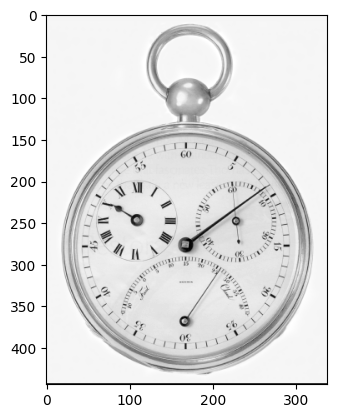

[26/03/2023, 14:13:58] Novo DPI:  72
[26/03/2023, 14:13:58] Tamanho da imagem:  (3692, 2812)
[26/03/2023, 14:13:58] Tamanho da imagem redimensionada:  (213, 162)
[26/03/2023, 14:13:58] saving image ...: 


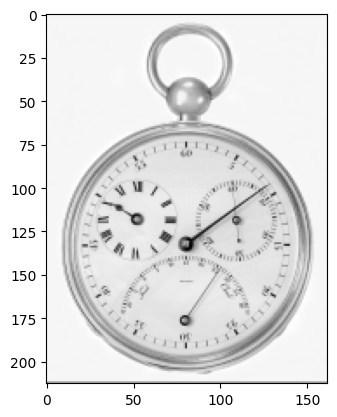

In [71]:
import logging

def main():
    try:
        image = GrayImageResizor(path = 'relogio.tif', dpi = 1250, debug = True)
        image.show()

        # Testando lançamento de excessão para dpi maior que o original
        # image.resize(5000)
        # image.showResult()

        image.resize(300)
        # image.showResult()
        image.saveResult('relogio_300.tif')

        image.resize(150)
        # image.showResult()
        image.saveResult('relogio_150.tif')

        image.resize(72)
        # image.showResult()
        image.saveResult('relogio_72.tif')
    except Exception as e:
        logging.exception("An exception was thrown!", str(e))


main()

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

In [75]:
# type your code here
# Python code to read image
import matplotlib.pyplot as plt
import numpy as np

class GrayImageRequantizer(GrayImageManipulator):
    def __init__(self, path = '', quantization = 8, debug = False) -> None:
        super().__init__(path=path, quantization=quantization, debug=debug)
    
    def requantize(self, newQuantization) -> None:
        if self.image is None:
            self.configImage()

        if self.quantization < newQuantization:
            raise ValueError('A nova quantização deve ser menor que: %s' % self.quantization)

        self.newQuantization = newQuantization

        if self.debug:
            self.log('Nova quantização', 2**newQuantization)
            self.logImageSize()

        newImage = np.floor((self.image / (2**(self.quantization - newQuantization))))
        self.result = newImage / (2**(newQuantization)-1) * 255


[26/03/2023, 14:49:14] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:14] ploting image ...: 


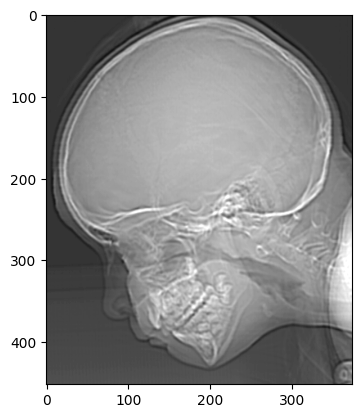

[26/03/2023, 14:49:14] Nova quantização:  128
[26/03/2023, 14:49:14] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:14] saving image ...: 


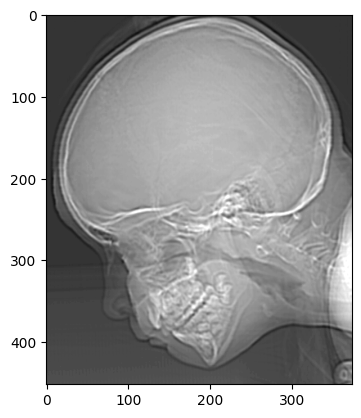

[26/03/2023, 14:49:15] Nova quantização:  64
[26/03/2023, 14:49:15] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:15] saving image ...: 


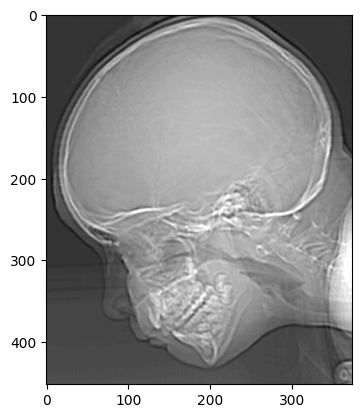

[26/03/2023, 14:49:15] Nova quantização:  32
[26/03/2023, 14:49:15] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:16] saving image ...: 


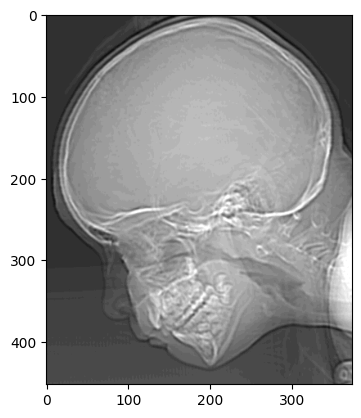

[26/03/2023, 14:49:16] Nova quantização:  16
[26/03/2023, 14:49:16] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:16] saving image ...: 


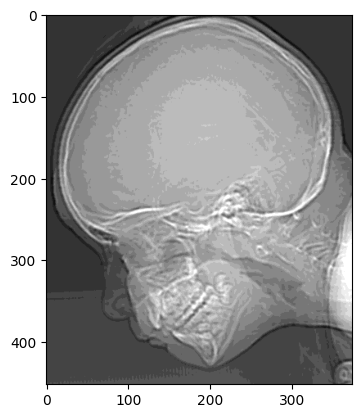

[26/03/2023, 14:49:17] Nova quantização:  8
[26/03/2023, 14:49:17] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:17] saving image ...: 


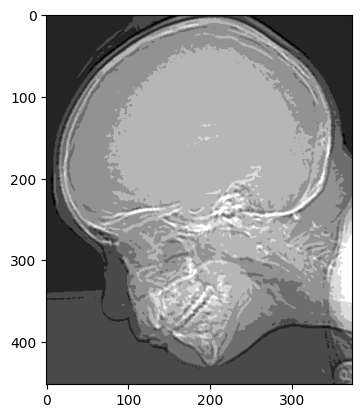

[26/03/2023, 14:49:17] Nova quantização:  4
[26/03/2023, 14:49:17] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:18] saving image ...: 


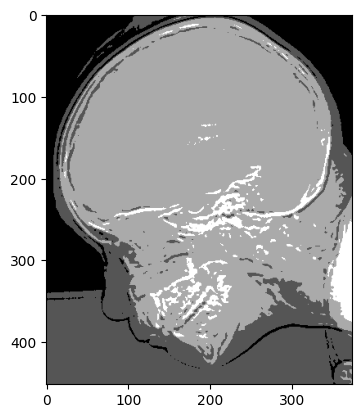

[26/03/2023, 14:49:18] Nova quantização:  2
[26/03/2023, 14:49:18] Tamanho da imagem:  (452, 374)
[26/03/2023, 14:49:18] saving image ...: 


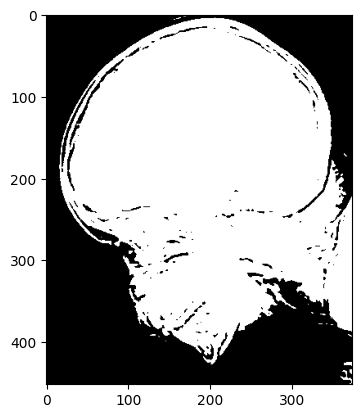

In [76]:
import logging

def main():
    try:
        image = GrayImageRequantizer(path = 'ctskull-256.tif', debug = True)
        image.show()

        image.requantize(7)
        # image.showResult()
        image.saveResult('ctskull-128.tif')

        image.requantize(6)
        # image.showResult()
        image.saveResult('ctskull-64.tif')

        image.requantize(5)
        # image.showResult()
        image.saveResult('ctskull-32.tif')

        image.requantize(4)
        # image.showResult()
        image.saveResult('ctskull-16.tif')

        image.requantize(3)
        # image.showResult()
        image.saveResult('ctskull-8.tif')

        image.requantize(2)
        # image.showResult()
        image.saveResult('ctskull-4.tif')

        image.requantize(1)
        # image.showResult()
        image.saveResult('ctskull-2.tif')
    except Exception as e:
        logging.exception("An exception was thrown!", str(e))


main()